In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def find_acc(x):
    xi = ""
    t = False
    for e in str(x):
        if not t:
            t = e in "123456789"
        if t:
            xi += e
    r = str(x).find(xi)
    if xi[0] in "123":
        return round(x, r), r
    return round(x, r - 1), r - 1

In [3]:
def find_accs(xs):
    res = []
    for i in xs:
        res.append(find_acc(i)[0])
    return np.array(res)

In [4]:
student_coef = 2.7764451051977987
N = 5

### Задание 1.1

In [5]:
el = pd.read_csv("elastic.csv") # pd.read_csv("elastic_heavy.csv")
el


,№ опыта,m1,m2,v10x,v1x,v2x
0,1,50.93,47.95,0.47,0.05,0.46
1,2,50.93,47.95,0.47,0.05,0.45
2,3,50.93,47.95,0.46,0.05,0.45
3,4,50.93,47.95,0.45,0.05,0.43
4,5,50.93,47.95,0.46,0.05,0.45


In [6]:
p10x = el["m1"] * el["v10x"]
p1x = el["m1"] * el["v1x"]
p2x = el["m2"] * el["v2x"]
delta_p = (p1x + p2x) / p10x - 1
delta_W = (el["m1"] * el["v1x"] ** 2 + el["m2"] * el["v2x"] ** 2) / (el["m1"] * el["v10x"] ** 2) - 1
table_7 = pd.DataFrame({"p10x": p10x, "p1x": p1x, "p2x": p2x, "delta_p": delta_p, "delta_W": delta_W})
table_7

,p10x,p1x,p2x,delta_p,delta_W
0,23.9371,2.5465,22.0570,0.027840,-0.086831
1,23.9371,2.5465,21.5775,0.007808,-0.125616
2,23.4278,2.5465,21.5775,0.029717,-0.087186
3,22.9185,2.5465,20.6185,0.010756,-0.127994
4,23.4278,2.5465,21.5775,0.029717,-0.087186


In [7]:
table_7["p10x"] = find_accs(p10x)
table_7["p1x"] = find_accs(p1x)
table_7["p2x"] = find_accs(p2x)
table_7["delta_p"] = find_accs(delta_p)
table_7["delta_W"] = find_accs(delta_W)
for i in table_7.iterrows():
    print("\t".join(map(str, i[1])))



24.0	3.0	22.0	0.028	-0.087
24.0	3.0	22.0	0.008	-0.126
23.0	3.0	22.0	0.03	-0.087
23.0	3.0	21.0	0.011	-0.128
23.0	3.0	22.0	0.03	-0.087


In [8]:
mean_delta_p = table_7["delta_p"].mean()
mean_delta_W = table_7["delta_W"].mean()
mean_delta_p, mean_delta_W

(0.0214, -0.10300000000000001)

In [9]:
mean_dp_err = student_coef * np.sqrt(np.sum((delta_p - mean_delta_p) ** 2) / (N * (N - 1)))
mean_dW_err = student_coef * np.sqrt(np.sum((delta_W - mean_delta_W) ** 2) / (N * (N - 1)))
mean_dp_err, mean_dW_err

(0.013571350526466557, 0.027045534648377813)

### Задание 1.2

In [10]:
nel = pd.read_csv("non_elastic.csv") # pd.read_csv("non_elastic_heavy.csv")
nel


,№ опыта,m1,m2,v10,v
0,1,53.96,50.89,0.43,0.15
1,2,53.96,50.89,0.41,0.12
2,3,53.96,50.89,0.42,0.15
3,4,53.96,50.89,0.35,0.07
4,5,53.96,50.89,0.35,0.08


In [11]:
p10 = nel["m1"] * nel["v10"]
p = (nel["m1"] + nel["m2"]) * nel["v"]
delta_p2 = p / p10 - 1
delta_W2_exp = (nel["m1"] + nel["m2"]) * nel["v"] ** 2 / (nel["m1"] * nel["v10"] ** 2) - 1
delta_W2_theor = -nel["m2"] / (nel["m1"] + nel["m2"])
table_9 = pd.DataFrame({"p10": p10, "p": p, "delta_p": delta_p2, "delta_W_exp": delta_W2_exp, "delta_W_theor": delta_W2_theor})
table_9

,p10,p,delta_p,delta_W_exp,delta_W_theor
0,23.2028,15.7275,-0.322172,-0.763548,-0.48536
1,22.1236,12.5820,-0.431286,-0.833547,-0.48536
2,22.6632,15.7275,-0.306034,-0.752155,-0.48536
3,18.8860,7.3395,-0.611379,-0.922276,-0.48536
4,18.8860,8.3880,-0.555861,-0.898483,-0.48536


In [12]:
table_9["p10"] = find_accs(p10)
table_9["p"] = find_accs(p)
table_9["delta_p"] = find_accs(delta_p2)
table_9["delta_W_exp"] = find_accs(delta_W2_exp)
table_9["delta_W_theor"] = find_accs(delta_W2_theor)
for i in table_9.iterrows():
    print("\t".join(map(str, i[1])))

23.0	16.0	-0.322	-0.76	-0.49
22.0	13.0	-0.43	-0.83	-0.49
23.0	16.0	-0.306	-0.75	-0.49
19.0	10.0	-0.61	-0.92	-0.49
19.0	10.0	-0.56	-0.9	-0.49


In [13]:
mean_delta_p2 = table_9["delta_p"].mean()
mean_delta_W2 = table_9["delta_W_exp"].mean()
mean_delta_p2, mean_delta_W2

(-0.44560000000000005, -0.8320000000000001)

In [14]:
mean_dp2_err = student_coef * np.sqrt(np.sum((delta_p2 - mean_delta_p2) ** 2) / (N * (N - 1)))
mean_dW2_err = student_coef * np.sqrt(np.sum((delta_W2_exp - mean_delta_W2) ** 2) / (N * (N - 1)))
mean_dp2_err, mean_dW2_err

(0.16952041874922358, 0.09544048590482175)

### Задание 2

In [15]:
x1 = 0.15
x2 = 0.80
g = 9.82
M1, M2 = 49.3, 100.3

In [16]:
wdf = pd.read_csv("weight.csv") #pd.read_csv("weight_heavy.csv")
wdf

,№ опыта,Количество шайб,m,v1,v2
0,1,0,2.1,0.21,0.29
1,2,1,3.0,0.25,0.39
2,3,2,3.8,0.34,0.46
3,4,3,4.7,0.39,0.52
4,5,4,5.6,0.43,0.58
5,6,5,6.4,0.47,0.63
6,7,6,7.3,0.50,0.67


In [17]:
lin_a = (wdf["v2"] ** 2 - wdf["v1"] ** 2) / (2 * (x2 - x1))
T = wdf["m"] * (g - lin_a)
table_11 = pd.DataFrame({"m": wdf["m"], "a": lin_a, "T": T})
table_11

,m,a,T
0,2.1,0.030769,20.557385
1,3.0,0.068923,29.253231
2,3.8,0.073846,37.035385
3,4.7,0.091000,45.726300
4,5.6,0.116538,54.339385
5,6.4,0.135385,61.981538
6,7.3,0.153000,70.569100


In [18]:
table_11["a"] = round(table_11["a"], 3)
table_11["T"] = round(table_11["T"]).astype(int)
for i in table_11.iterrows():
    print("\t".join(map(str, i[1])))

2.1	0.031	21.0
3.0	0.069	29.0
3.8	0.074	37.0
4.7	0.091	46.0
5.6	0.117	54.0
6.4	0.135	62.0
7.3	0.153	71.0


In [19]:
table_11["a"] = find_accs(table_11["a"])
table_11["T"] = find_accs(table_11["T"])
for i in table_11.iterrows():
    print("\t".join(map(str, i[1])))

2.1	0.031	21.0
3.0	0.07	29.0
3.8	0.07	37.0
4.7	0.09	50.0
5.6	0.12	50.0
6.4	0.14	60.0
7.3	0.15	70.0


### МНК

y=a+bx

T=F_fr + M1*lin_a

In [20]:
x = np.array(lin_a)
y = np.array(T)
x_mean = x.mean()
y_mean = y.mean()

In [21]:
b = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean) ** 2)
a = y_mean - x_mean * b
a, b

(5.391677083974741, 420.81668221972865)

In [22]:
d = y - (a + b * x)
D = sum((x - x_mean) ** 2)
S_b = ((1 / D) * sum(d ** 2) / (N - 2)) ** 0.5
S_a = ((1 / N + x_mean ** 2 / D) * sum(d ** 2) / (N - 2)) * 0.5
a_err = 2 * S_a
b_err = 2 * S_b

In [23]:
a_err, b_err

(12.854967621224135, 67.48221570525813)

In [24]:
F_fr, F_fr_err = a, a_err
M, M_err = b, b_err

In [25]:
M, M_err

(420.81668221972865, 67.48221570525813)

In [26]:
F_fr

5.391677083974741

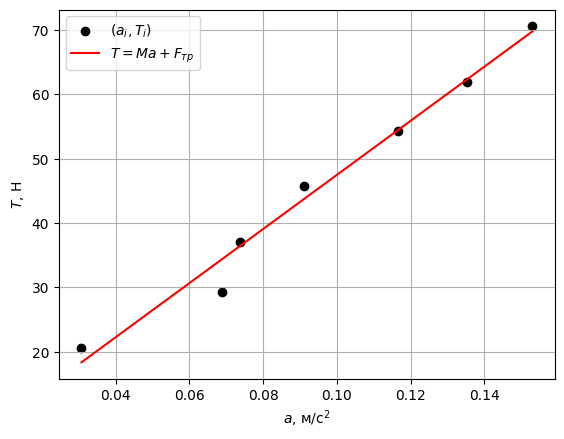

In [27]:
plt.scatter(lin_a, T, c="black", label=r"$(a_{i}, T_{i})$")
plt.plot(lin_a, M * lin_a + F_fr, c="red", label=r"$T=Ma+F_{тр}$")
plt.xlabel(r"$a$, " + "м/c" + r"$^2$")
plt.ylabel(r"$T$, " + "Н")
plt.grid()
plt.legend()

## Для графика 

In [28]:
lin_a_1 = lin_a
M_1 = M
F_fr_1 = F_fr
T_1 = T

In [29]:
x1 = 0.15
x2 = 0.80
g = 9.82
M1, M2 = 49.3, 100.3
wdf = pd.read_csv("weight_heavy.csv") #pd.read_csv("weight_heavy.csv")
lin_a = (wdf["v2"] ** 2 - wdf["v1"] ** 2) / (2 * (x2 - x1))
T = wdf["m"] * (g - lin_a)
table_11 = pd.DataFrame({"m": wdf["m"], "a": lin_a, "T": T})
table_11["a"] = round(table_11["a"], 3)
table_11["T"] = round(table_11["T"]).astype(int)
for i in table_11.iterrows():
    print("\t".join(map(str, i[1])))
table_11["a"] = find_accs(table_11["a"])
table_11["T"] = find_accs(table_11["T"])
for i in table_11.iterrows():
    print("\t".join(map(str, i[1])))

x = np.array(lin_a)
y = np.array(T)
x_mean = x.mean()
y_mean = y.mean()
b = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean) ** 2)
a = y_mean - x_mean * b
d = y - (a + b * x)
D = sum((x - x_mean) ** 2)
S_b = ((1 / D) * sum(d ** 2) / (N - 2)) ** 0.5
S_a = ((1 / N + x_mean ** 2 / D) * sum(d ** 2) / (N - 2)) * 0.5
a_err = 2 * S_a
b_err = 2 * S_b
F_fr, F_fr_err = a, a_err
M, M_err = b, b_err

2.1	0.014	21.0
3.0	0.023	29.0
3.8	0.039	37.0
4.7	0.046	46.0
5.6	0.058	55.0
6.4	0.07	62.0
7.3	0.083	71.0
2.1	0.014	21.0
3.0	0.023	29.0
3.8	0.039	37.0
4.7	0.05	50.0
5.6	0.06	60.0
6.4	0.07	60.0
7.3	0.08	70.0


In [30]:
lin_a_2 = lin_a
M_2 = M
F_fr_2 = F_fr
T_2 = T

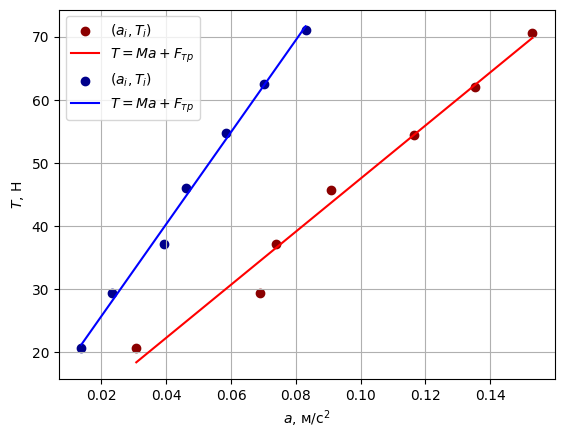

In [31]:
plt.scatter(lin_a_1, T_1, c="darkred", label=r"$(a_{i}, T_{i})$")
plt.plot(lin_a_1, M_1 * lin_a_1 + F_fr_1, c="red", label=r"$T=Ma+F_{тр}$")
plt.scatter(lin_a_2, T_2, c="darkblue", label=r"$(a_{i}, T_{i})$")
plt.plot(lin_a_2, M_2 * lin_a_2 + F_fr_2, c="blue", label=r"$T=Ma+F_{тр}$")
plt.xlabel(r"$a$, " + "м/c" + r"$^2$")
plt.ylabel(r"$T$, " + "Н")
plt.grid()
plt.legend()